For citation information, please see the "Source Information" section listed in the associated README file: https://github.com/stephbuon/digital-history/tree/master/hist3368-week10-distinctiveness

# Hist 3368 - Week 10: Measuring Distinctiveness with Log Likelihood 

#### By Jo Guldi and Steph Buongiorno

For citation information, please see the "Source Information" section listed in the associated README file: https://github.com/stephbuon/digital-history/tree/master/hist3368-week9-log-likelihood

We've been counting many things so far: stop-worded words and words from a controlled vocabulary, words over time, grammatical constructions and parts of speech.  

Sometimes, however, what one really wants to know is not the *raw* counts, but rather how two or more categories of counts compare to each other.

For instance, imagine that Steph and Jo are friends.  Imagine that they pool their emails to each other into a dataset.  The top words for both of the friends are almost all the same: "time," "when," "friend," "meet", "thanks," "work," etc.  The words that are quantitatively the most frequent aren't very informative.  

However, if I measure the words that only *one friend* uses and the other friend doesn't, those words are very interesting: "bike," "handlebar," "crampon," "scuba," etc.  We can learn from these words what sports and hobbies are enjoyed by one friend and not the other. 

Because we've introduced a new rule -- we're looking for words that one person uses but not both -- we're finding "distinctive" words.  These words that may not be the most frequent overall, but they are nevertheless some of the most informative.  
    
Looking for the most *distinctive* words for each of us takes you straight to the give-away clues that I'm a cyclist and my friend is a cave-diver. 

### Log Likelihood as a Score of Distinctiveness

Just so, in this notebook, we're going to learn how to use one of the most common statistical measures for calculating "distinctiveness."  That measure is "log likelihood."  Technically, it's a mathematical improvement on the naive version that I describe here, where I look for my-email(not my-friend's-email), because it performs a calculation that results in a "log likelihood score," which is a guess by the computer of how "distinctive" a word is.

Applied to the example above, the output might look like this: 

##### Jo's most distinctive words, with their distinctiveness scores calculated by log-likelihood

    bike : 1
    handlebar: 1
    lube: 1
    chain : .3
    path : .3

##### Steph's most distinctive words, with their distinctiveness scores calculated by log-likelihood

    scuba : 1
    backroll: 1
    bootie: 1
    buoyancy: .9
    tank : .3
    mask : .3
    cave : .3

Notice that there's a lot more information with these scores than in the way I originally described the experiment. The score of .3 for "path," "cave," etc. Show you that there are some words that I tend to use more than my friend, and conversely her more than me -- but we both *sometimes* use these words.  They're only 30% distinctive, whereas words like "bike" or "scuba" that only one of us uses are 100% distinctive, and therefore have a higher score. 

### The Log Likelihood equation

Here is what it looks like for one word, "bike." We need four pieces of input and one calculation: 
    
        a = how many times the word "bike" appears in Jo's email
        b = how many times the word "bike" appears in everyone else's email -- Steph's, and if we're measuring others as well, those other friends too: let's say Audre's and Beth's
        c = how many times OTHER words than "bike" 
        d = how many times OTHER words than "bike" appear in everyone else's email --  which is the equivalent of all the words in the corpus, minus a, minus b, minus c
        total_corpus_words = the total number of words in the corpus.  This should be the equivalent of a + b + c + d.
      
Next, we make three calculations to get the log likelihood score:

        E1 = (a + c) * (a + b) / total_corpus_words 
        E2 = (b + d) * (a + b) / total_corpus_words 
        
        LL = 2 * (a * log(a / E1)) + 2 * b * log(b / E2)

If you're a math nerd, you might think about how we're taking a calculation of the specificity of "a" (how often I write "bike") relative to "c" (how many words I wrote in all) and the number of total corpus words, and conversely how specific "bike" is to other people (b, d). 

The function "log" normalizes both calculations.  Further multiplications make the calculations more specific to "a" (my usage of the word) and "b" (my friends' usage of the word).  

If you feel overwhelmed: don't worry about this section.  Just accept that we're creating a numerical score of distinctiveness.  It's more important, in this class, to be able to use the distinctiveness measure than to understand where it comes from.  So long as you can run the code in the one section where we tell Python to execute a log likelihood score, you should be fine. 


### Why you want to know about distinctiveness

Distinctiveness scores can be applied to anything. If you're trying to understand what makes speakers in Congress different from each other, you can recreate the above experiment with their words and get a working definition of how different each is -- one that will be far more meaningful than the list of top words used by each, or the words used by only one but not the other.  

But you can also do so much more with this wonderful, flexible measure! You can use it to improve your understanding of time. You can use distinctiveness measures to figure out which words were more distinctive of the 1970s than the 1980s, or the 1980s than the 1990s -- and you can then make *those* words the subject of your charts over time or your questions about which speaker introduced a particularly meaningful word.  

All you have to do is understand some basic questions about how to format data, how to perform a statistical calculation, and how to use that calculation.

### What this notebook will do

This notebook will use a sample dataset from EDGAR, the quarterly reports of American corporations.  It will walk you through reformatting the data to get rid of punctuation and words that only appear once (which may be typos, and which, in any case, will throw off the log likelihood calculations, making them less useful).

We'll then bring in some tools from the SKLEARN package of statistics and machine learning software, especially CountVectorizer(), vectorizer.get_feature_names(),  and vectorizer.todense().  

A "vector" is a matrix of words and their frequency, representing every word in the corpus.  For instance, for the example above, a descriptive vector for my emails' words might look like this: 

    time : 100
    when : 100
    meet : 99
    thanks : 90
    bike: 15
    handlebar: 10
    path: 10
    lube: 4
    chain: 3

You'll use the tools of CountVectorizer to make some word vectors with data that preserves everything else you know about the words -- for instance, which speaker they relate to, when they were published, etc.  Along the way, we'll inspect the data so that you know what's being done to the word vector. 

We'll then apply the "log likelihood" calculation to these vectors to produce a score of what is most distinctive about each speaker's report.  

### A word to those new to code

If you are learning code for the first time, being able to recreate every single step along the way is far less important than getting a general feel for what the steps are:
* cleaning (which you've seen before)
* counting (which you've seen before)
* vectorizing (this is new, but it's a lot like counting words)
* working with vectors (to get them in the right format for statistical analysis)
* statistical analysis (a loop that runs the log likelihood equation)
* visualization

Try to pay attention to just a few new commands to see how they work:
* CountVectorizer() -- to turn data into a vector 
* vectorizer.get_feature_names() -- to inspect a vector 
* vectorizer.todense -- to reformat a vector for future analysis
* the for loop that runs the log likelihood equation.

Most importantly, pay attention to what the most distinctive words look like for the corporations we sample, and how we use visualizations to interpret them. Think about how this might apply to your data challenge!

### A few suggestions as you start on this week's notebooks:

* You will note that the str_replace() method of looking for words and phrases is REALLY slow: 

        df['Content'] = df['Content'].str.replace(pattern, "") 
        

  Don't be afraid to use the alternative code, which is hidden behind a comment (#):

        df['Content'] = df['Content'].apply(lambda x: " ".join(x for x in x.split() if x not in words_appear_once)) 
        

  We're not teaching the grammar of these variations, because they're deep Python rather than the easy syntax of pandas. But you are welcome to use them by copying and pasting!

* As always, if you run into trouble around *import* functions, try "installing" the software package in question: 
      
          !pip install [package] --user 
          
        
* There are at least two places where errors are supposed to occur: 

     (1) in the first few lines of loading EDGAR, where we drop or delete columns (really a cosmetic step, as I suggested in class). and 
        
     (2) where I tell you to take the log of zero, which will produce an error because the log of zero is infinity.  
    In both cases, you should read the commentary.

With that, let's dive in!

## Load Some Data

In [27]:
import pandas as pd

In [28]:
cd /scratch/group/history/hist_3368-jguldi

/scratch/group/history/hist_3368-jguldi


***Give this several minutes; we're reading in big data:***

In [29]:
congress = pd.read_csv("congress1967-2010.csv")
#congress = pd.read_csv("eighties_data.csv")

In [30]:
congress = congress[congress['year'] == 1968]

Let's look at the dataframe to make sure that the contents match our expectations.

In [31]:
congress[:10]

,Unnamed: 0,Unnamed: 0.1,speech,date,speaker,word_count,year,month,month_year
185175,185175,185175,Mr. President. I suggest the absence of a quorum.,1968-01-15,Mr. MANSFIELD,9,1968,1,1968-01-01
185176,185176,185176,The clerk will call the roll.,1968-01-15,The VICE PRESIDENT,6,1968,1,1968-01-01
185177,185177,185177,I announce that the Senator from New Mexico . ...,1968-01-15,Mr. BYRD of West Virginia,200,1968,1,1968-01-01
185178,185178,185178,I announce that the Senator from Massachusetts...,1968-01-15,Mr. KUCHEL,66,1968,1,1968-01-01
185179,185179,185179,A quorum is present.,1968-01-15,The VICE PRESIDENT,4,1968,1,1968-01-01
185180,185180,185180,The Chair appoints the majority leader. the Se...,1968-01-15,The VICE PRESIDENT,32,1968,1,1968-01-01
185181,185181,185181,Mr. President. a parliamentary inquiry.,1968-01-15,Mr. MORSE,5,1968,1,1968-01-01
185182,185182,185182,The Senator from Oregon will state it.,1968-01-15,The VICE PRESIDENT,7,1968,1,1968-01-01
185183,185183,185183,I have two or three parliamentary inquiries. F...,1968-01-15,Mr. MORSE,64,1968,1,1968-01-01
185184,185184,185184,The Chair knows of no such rule that would den...,1968-01-15,The VICE PRESIDENT,14,1968,1,1968-01-01


## Cleaning the Data

We're going to use a tool that will do the lemmatization, lowercasing, and stopwording for us.  All we have to do now is remove punctuation, get rid of digits standing on their own, and eliminate any one-letter items, which are probably initials.

In [19]:
clean_congress = congress.copy()
clean_congress['speech'] = clean_congress['speech'].str.replace('[^\w\s]','') # remove punctuation
clean_congress['speech'] = clean_congress['speech'].str.replace('\d+', '') # for digits
clean_congress['speech'] = clean_congress['speech'].str.replace(r'(\b\w{1}\b)', '') # for short words

## Organizing the Data

In the exercise that follows, we'll be measuring what is 'distinctive' about each speaker.  We could configure the experiment in a variety of ways -- comparing speakers; comparing years; comparing all speakers and all years.  What we decide to compare governs how we will arrange the database and measure difference.  But in this experiment, we're just comparing speakers.  

First, we want to create a dataframe where every speaker is listed only once, and the 'Content' column holds all the text related to that speaker.  In df, every speaker has several rows, each one with the content from a different year.  

In [20]:
clean_congress[:5]

,Unnamed: 0,Unnamed: 0.1,speech,date,speaker,word_count,year,month,month_year
185175,185175,185175,Mr President suggest the absence of quorum,1968-01-15,Mr. MANSFIELD,9,1968,1,1968-01-01
185176,185176,185176,The clerk will call the roll,1968-01-15,The VICE PRESIDENT,6,1968,1,1968-01-01
185177,185177,185177,announce that the Senator from New Mexico th...,1968-01-15,Mr. BYRD of West Virginia,200,1968,1,1968-01-01
185178,185178,185178,announce that the Senator from Massachusetts ...,1968-01-15,Mr. KUCHEL,66,1968,1,1968-01-01
185179,185179,185179,quorum is present,1968-01-15,The VICE PRESIDENT,4,1968,1,1968-01-01


Let's move from this long dataframe to a list of the top speaker, their speeches, and the count of how much they spoke overall.

* We are grouping by "speaker" and adding together (sum()) the column word_count.  

* We use sort_values() to arrange by total word count and [:10] to grab the top ten.  

* We use ['word_count'] to grab the only column that matters to us -- the total words per speaker.

Here are the top ten speakers by total count of words for the year 1968:

In [21]:
# Combine all documents of every speaker
top_speakers = clean_congress.groupby('speaker').agg({'speech': ' '.join, 'word_count': 'sum'}).sort_values('word_count', ascending = False)[:10]

In [22]:
top_speakers

,speech,word_count
speaker,,
Mr. JAVITS,Mr President ask unanimous consent that the S...,278818
Mr. LONG of Louisiana,Mr President will the Senator yield Mr Preside...,254330
The PRESIDING OFFICER,The clerk will call the roll Without objection...,237972
Mr. MANSFIELD,Mr President suggest the absence of quorum M...,217784
Mr. BYRD of West Virginia,announce that the Senator from New Mexico th...,216406
Mr. WILLIAMS of Delaware,Mr President should like to join my colleague...,215164
Mr. PROXMIRE,Mr President last night President Johnson deli...,189169
Mr. DODD,Mr President immediately after the Presidents ...,174365
Mr. HOLLAND,Mr Speaker no one values more highly than do ...,171353


Let's get rid of "the Presiding Officer," since that's an office, not a person.

In [23]:
top_speakers = top_speakers[top_speakers.index != 'The PRESIDING OFFICER']
top_speakers

,speech,word_count
speaker,,
Mr. JAVITS,Mr President ask unanimous consent that the S...,278818
Mr. LONG of Louisiana,Mr President will the Senator yield Mr Preside...,254330
Mr. MANSFIELD,Mr President suggest the absence of quorum M...,217784
Mr. BYRD of West Virginia,announce that the Senator from New Mexico th...,216406
Mr. WILLIAMS of Delaware,Mr President should like to join my colleague...,215164
Mr. PROXMIRE,Mr President last night President Johnson deli...,189169
Mr. DODD,Mr President immediately after the Presidents ...,174365
Mr. HOLLAND,Mr Speaker no one values more highly than do ...,171353
Mr. TYDINGS,Mr President as those more familiar with the C...,169010


Notice that the entire dataset is only nine rows long.  

All the 'speech' columns for multiple entries for each speaker have been pasted into one column by the commands "groupby" and ".agg" (where we told .agg to use .join on the 'speech' column).

# Working With Wordcount Vectors

Next, we're going to import some statistics tools from the SKLEARN package (pronounced 'sci kit learn.').  The first tool is CountVectorizer().   CountVectorizer() turns a series of documents into "vectors," or long lists of counts, each of which corresponds to a unique word in the corpus.  

*Why is this important?  Because modeling our documents as word vectors will make it easy for us to compute the distinctiveness of words related to speakers.*

Here's a brief introduction to CountVectorizer() which explains what wordcount vectors are:


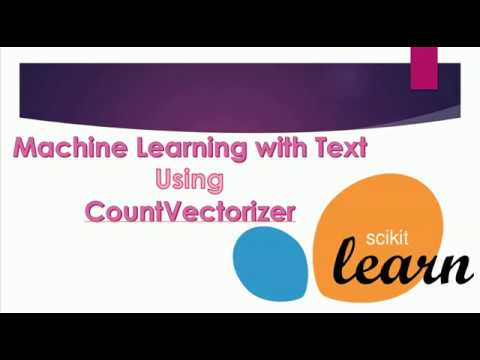

In [24]:
from IPython.display import YouTubeVideo
YouTubeVideo('NhgGEE2BJJo', width=800, height=300)

In [25]:
# use as necessary
#!pip install sklearn --user
#!pip install numpy --user

In [26]:
#import some software
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

ModuleNotFoundError: No module named 'nltk'


Countvectorizer() will begin thinking about making a dataframe for counting every word of the corpus.  for it to work, we have to set some presets: how many features a giant column of entries of counts for every word in the entire corpus (a 'wordcount vector', which we're calling 'allwordcountsvector').  The word 'finance' will have a row; 'security; will have a row, etc.  

In [ ]:
vectorizer = CountVectorizer(
    max_features=10000, 
    lowercase=True, 
    stop_words = 'english',
    ngram_range=(1,2), 
    analyzer = "word",
    #tokenizer=LemmaTokenizer()
    )

Note that there isn't anything IN vectorizer yet; we can't look at it.  It's just a collection of commands:
- max_features -- tells the vectorizer to look for only the most frequent 10000 terms in the corpus; this means it will throw out many one-time or two-time features.
- lowercase=True tells the vectorizer to lowercase everything -- strictly speaking it's redundant since we already did that above.
- stop_words -- applies stopwording
- ngram_range=(min, max) means that we're asking it to find all one-word ngrams, but nothing over two n-grams in a row. we could play with this.  
-analyzer -- can be "word" or "char".  
- LemmaTokenizer() -- lemmatizes words (if used -- slows down the code)

SKLEARN has a lot of built-in features for using these tools to make word vectors very smart -- for example, creating custom stop-word lists.  To read up on countvectorizer(), see  https://kavita-ganesan.com/how-to-use-countvectorizer/

Next, we'll use the fit_transform() command from SKLEARN to create a giant column of entries of counts for every word in the entire corpus (a 'wordcount vector', which we're calling 'vectorizer').  The word 'finance' will have a row; 'security; will have a row, etc.  

In [ ]:
vectorized = vectorizer.fit_transform(top_speakers['speech'])

Great! You made a word vector. Now what's inside?

### Navigating a Word Vector

*The section below goes into word vectors deep.  It contains far more information than you need to complete this assignment. However, this background information may be useful for you in understanding what a word vector is.*

A Word Vector stores the counted up word tallies in the specified column, in this case, ['Content']. They are grouped by the rows in the dataframe, in this case, ['speaker']. So we should be able to extract lots of information: a list of words, a list of counts, and how many different matrices (one per speaker) there are.

To extract the word names, we use 

        vectorizer.get_feature_names() 
        
        
To extract the word counts, we use

        vectorizer.todense()
        

To extract general information about how many words and counts there are, we use

        vectorized.shape


We can also look at any individual item in the word vector by calling its coordinates:

        vectorized[speaker_id, word_id]


Here's what it actually looks like.  To make wordcount vectors swift, the computer stores the wordcounts as numbers; the labels 'word' and 'speaker' are stored elsewhere.

In [ ]:
print(vectorizer.get_feature_names()[:100])

In [ ]:
vectorized.todense()

The 'vectorized' variable also has information about the wordcounts per speaker.  It is a matrix with eight columns and 10,000 words each (remember how we set the word vectors to count the most common 10,000 words?) 

In [ ]:
vectorized.shape

We can call the wordcount vector matrix by giving it the coordinate of every speaker (0 is Javits, 7 is Dodd) and the id number of every word (0 to 10000).

Here's what it actually looks like.  To make wordcount vectors swift, the computer stores the wordcounts as numbers; the labels 'word' and 'speaker' are stored elsewhere.

So let's try it out.  How many times does Mr. Mansfield (#3 when you start counting from zero, as Python does) mention the  "14th amendment" (#2 in the wordlist when you start counting from zero)?

In [ ]:
vectorized[3, 2]

### Getting information out of a Word Vector

*This section is also outside the bounds of what you really need to know to work with word vectors.  Continue reading if you'd like to see word vectors in action, or skip to the next section.*

So far we know what a word vector looks like.  Perhaps we trust that the word vector has modeled our documents. But we might understandably feel frustrated.  Vectors are a little hard to use, frankly; matrices are notoriously hard to get labels out of.  Ideally we'd like a dataframe with a column called "word" and another column called "speaker," and the wordcount for each.  


The NUMPTY and PANDAS packages excel at normalizing difficult-to-read data formats.

In [ ]:
# !pip install numpy --user 

In [ ]:
import numpy as np

Let's make a list of words.  We can use

        vectorizer.get_feature_names()
       

In [ ]:
all_words = np.array(vectorizer.get_feature_names())

In [ ]:
all_words[:20]

Let's make a list of speakers. We have this information in the 'row' names of log_df.  

Specifying 
        
        .axes[0] 


lets us call the vertical axis names (that is, the row names of the dataframe).  Two other commands:

        to_numpy()  
        list()


helps with formatting.  Put together:

        list(df.axes[0].to_numpy())
        

In [ ]:
speaker_names = list(top_speakers.axes[0].to_numpy())

In [ ]:
speaker_names

We can glue together all_words and speaker_names into an easy-to-read DataFrame using pandas' pd.DataFrame():

In [ ]:
vectors_dataframe = pd.DataFrame(vectorized.todense(), # the matrix we saw above is turned into a dataframe
                                 columns=all_words,
                                 index = speaker_names
                                 )

In [ ]:
vectors_dataframe

We're going to use this dataframe -- vectors_dataframe -- as the basis for our log likelihood calculations.  It's just a table of word counts that has been standardized across all speakers, so that we can easily count the number of words in the total corpus (= the number of columns), the number of words in any speaker's corpus (= the number of non-zero columns per row), and the count of any word.speaker

 To use that information, we're going to have to be able to look up the entry for a word per speaker. If we want to call a particular speaker-word count up, like we did above, we use the pandas iat[] command for looking up a value.  
 
 * The rule is iat[column, row], or for our purposes, [speaker, word].  
 * Remember that numbering in Python always starts with 0, so [0, 1] is the entry for the first speaker (Javits) and the second word over (abated):

In [ ]:
vectors_dataframe.iat[0,0]

In [ ]:
vectors_dataframe.iat[7,203]

Who is speaker # 7?

In [ ]:
top_speakers.index[7]

What is word # 203?

In [ ]:
all_words[203]

### Use Word Vectors to Count Totals

Did you know that you can use Word Vectors as another method to count the number of words in a corpus?  You can!  Just like Counter, most_common(), and .value_counts() -- the tools for counting words we've used so far -- Word Vectors can be used to total the number of words.

Here are the per-speaker total words.

In [ ]:
speaker_words_total = vectors_dataframe.sum(axis=1)
speaker_words_total

Here are the per-word totals across all speakers.

In [ ]:
word_totals = vectors_dataframe.sum(axis=0) 
word_totals

How many words are there overall?

In [ ]:
total_corpus_words = sum(word_totals)
total_corpus_words

Now that we have statistics on how many words or phrases were detected around each speaker, and how many appearances there are per word, as well as word per speaker, we're in a position to do statistics.

# Measuring Distinction with Log Likelihood

Now that we can count the frequency of each word per speaker, we can use that information to calculate the log likelihood of each word per speaker.  As we saw in this week's reading, LL is an excellent proxy for "distinctiveness;" high LL scores correspond fairly well to what is unique about each document.  Thus we'll use LL scores to find out which words appear in Long's speeches but not Javits', etc.

### Python as a calculator

Remember, Python can act just like a calendar.

In [ ]:
5 + 5

In [ ]:
a = 5
b = 5
a + b

### Logarithm refresher

Remember from high school math that a logarithm is a function that "normalizes" big and small numbers from 0 up, so that you can plot enormous differences along a much smaller axis:

In [ ]:
np.log(1)

In [ ]:
np.log(100)

In [ ]:
np.log(100000000000)

Also, remember that Log doesn't like zeros:

In [ ]:
np.log(0)

You should see a pink warning message above.

### A Very Basic Intro to the Log Likelihood Equation

The LL calculation -- which we'll perform for each word-speaker pair -- depends on variables a, b, c, and d: 
- a: how many times the word being measured appears in ONE speaker whose distinction we're measuring.                                     
- b: how many times the word being measured appears in all OTHER speakers               
- c: how many OTHER words appear in the speaker whose distinction we're measuring
- d: how many times OTHER words appears in all OTHER speakers


We've actually already generated all the information we need for a, b, c, d.  Really! We're nearly there.

- a: how many times each word occurs per speaker lives in the vectors_dataframe.  We can call it for each speaker and word: 
                
                    vectors_dataframe.iat[speaker number, word id]
                    
                 
- b: How many times each word appears in all other speakers -- is equal to the the total number of occurrences of tha Word, minus a. Recall that we have a dataframe called word_totals, where words are arranged in the same order as they are in vectors_dataframe.  So we can call this number withL 
            
                    word_totals[word_id] - a                 
                    
                    
- c: the speaker's's total words lives in a dataframe called speaker_words_total.  We can get the total of OTHER words by calling that total and subtracting a. We can reference the proper row this way:

                speaker_words_total[speaker_id] - a
                
                
- d: the sum of other speakers' use of other words is equal to the total number of words in the corpus, minus a, b, and c.  Fortunately, we already calculated the total number of words and saved it as a variable:
                
                total_corpus_words - a - b - c 

Here's the log likelihood equation that we showed you above, in code. 

Notice that we make sure that we don't have any zeros in if(b > 0):

In [ ]:
# create an empty dataframe
speakers_loglikelihood = []

#loop through every speaker in speaker_names
for speaker_id, speaker in enumerate(speaker_names):
    loglikely = []
    # loop through every word in the wordcount vector:
    for word_id in vectorized[speaker_id].indices:
        
        a = vectors_dataframe.iat[speaker_id, word_id] #  word in speaker
        b = word_totals[word_id] - a  # # word in remaining speakers
        c = speaker_words_total[speaker_id] - a #  not word in speaker
        d = total_corpus_words - a - b - c # not word in remaining speakers
       
        E1 = (a + c) * (a + b) / total_corpus_words  
        E2 = (b + d) * (a + b) / total_corpus_words 
        
        LL = 2 * (a * np.log(a / E1)) # the log likelihood equation
        if (b > 0):
            LL += 2 * b * np.log(b / E2)
        
        loglikely.append((LL, all_words[word_id])) # add the log likelihood score to the end of a new dataframe

    loglikely = sorted(loglikely, reverse=True) # the loop hits this every time it cycles through all the words in one speaker. 
    speakers_loglikelihood.append(loglikely) # add on another speaker


Now we have a log-likelihood score for each speaker-word combination.  It's organized as a list of lists.  

Each speaker list of words is organized in by descending log-likelihood score. Here's Mr. Long:

In [ ]:
speakers_loglikelihood[1][:5]

Here's the most distinctive words per speaker:

In [ ]:
print("The 20 most distinctive words of each speaker. The words are listed from high to low ranking")
print("-------------------------------------------\n")
for i, speaker in enumerate(speaker_names):
    print(speaker + ": ", end='')
    distinct_words = [word[1] for word in speakers_loglikelihood[i][:100]]
    print(distinct_words)
    print("\n-----------------------------\n")

## Visualizing the distinctiveness of the language of each speaker

Can visualizing the data help us to better understand these words and how they relate to the speakers?

In [ ]:
# use as needed
#!pip install adjustText

In [ ]:
import adjustText
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np

***If you get an error message here, you might have loaded Jupyter with the "Spacy" environment from a previous session.  Restart Jupyter with no special environment and the command should work.***

Note that we're going to make a big plot.

***This might take a minute or two to run.***

In [ ]:
cd ~/digital-history

In [ ]:
%matplotlib inline
from adjustText import adjust_text

#plt.show()
# change the figure's size here
#fig = plt.figure(figsize=(15,15), dpi = 500)
plt.figure(figsize=(15,15), dpi = 300)

# style
plt.style.use('seaborn-darkgrid') # this gives us a grid with a dark background.  you can play with this to change the style.
  
# create a color palette
palette = plt.get_cmap('hsv') # this tells matplotlib what colors to use.  you can play with this to change the colors.

num = 0

texts = []

# this is the for loop that creates multiple plots.  
for i, speaker in enumerate(speaker_names):
        num += 14 # num tells the plot to choose a different color for each speaker
        distinct_words = speakers_loglikelihood[i][:15] # plot the top twenty words by LL-score
        for word in distinct_words: # for each word-per-speaker instance, plot the ll_score on the y axis
            ll_score = word[0] # find just the ll-score from speakers_loglikelihood
            word_label = word[1] # find just the keyword name from speakers_loglikelihood
            plt.scatter( # draw a dot for each word
                    speaker, # with speaker on the x axis
                    ll_score, # and ll_score on the y axis
                    color=palette(num), # using a different color for each speaker
                    linewidth=1, 
                    edgecolors = 'b',
                    s = 55, # size
                    alpha=0.3, # make the dots slightly transparent
                    label=speaker) # label each dot with the name of the word
            texts.append(plt.text(speaker, ll_score, word_label)) # save these coordinates to be used in labeling

# Add legend
#plt.legend(loc=2, ncol=2)
plt.xticks(rotation=90)
 
# Add titles
plt.title("Figure 1: Highest Log-Likelihood Scored Words per Speaker", fontsize=30, fontweight=0, color='Red')
plt.xlabel("Speaker")
plt.ylabel("Distinctiveness of Words, Measured by LL Score")

# Code to help with overlapping labels -- may take a minute to run
adjust_text(texts, force_points=0.2, force_text=0.2,
            expand_points=(1, 1), expand_text=(1, 1),
            arrowprops=dict(arrowstyle="-", color='black', lw=0.5))



# let's save it!
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('LL-fig1.jpg', dpi=300)


Please notice in the left-hand sidebar that we've saved a .jpg of this visualization.  

We can use visualization to really drill down into the comparisons. We learn that overall, Mr. Javits and Mr. Long have the least unique language.  Mr. Byrd and Mr. Mansfield are more unique.  We could tweak the graph to show more words in a small space, and it gives us a way of inspecting the relative uniqueness of the different word-speaker pairs.

We can also learn about some interesting specializations:
* Mr. Proximire cares about human rights and genocide
* Mr. Dodd talks a lot about the rifle lobby, firearms, and gun control.
* Mr. Holland talks about meat and agriculture.
* Mr. Williams cares about taxpayers, tax reduction, the budget, and spending
* Mr. Javits cares about Israel, coffee and workmen's compensation. 
* Mr. Long talks about the sea and Louisiana and the continental shelf.

But the above visualization is also deeply unsatisfying in some respects.  The graph above doesn't add much new information beyond what we had in the list we printed out.

What if we wanted to take things further and compare two speakers?

### A 2-D comparison of two speakers

The visualization below shows the same data we just looked at, only zooming it to compare two speakers.  

Note that we could also do this -- with more accuracy about how two speakers compare -- by filtering for only two speakers BEFORE we ran the log likelihood equation.  We're not actually creating a measure, here, of the distinctivenss of Mr. Javits and Mr. Long; we're just extracting the information about two speakers from the information about how seven speakers are different from each other. That's a subtle but important mathematical difference.

What zooming in on two speakers can do is to remind us that we've got a great deal of information about a great many words -- many more words than showed up in the visualization above, and much more detail than we get from a bar chart of word frequency.

To begin, let's create a dataframe that has the ll_scores from just two speakers. ***The x coordinate will be how distinctive each word is for Javits; the y coordinate will be how distinctive each word is for Long.***

In [ ]:
# create a new dataframe of the scores and words from both Javits and Long
xcoords =  pd.DataFrame(columns=list(['word_label', 'x_llscore']))
ycoords = pd.DataFrame(columns=list(['word_label', 'y_llscore']))

# get all the words from JAVITS
distinctwords = speakers_loglikelihood[0]
for word in distinctwords: # for each word-per-speaker instance, plot the ll_score on the y axis
    x_llscore = word[0] # find just the ll-score from speakers_loglikelihood
    word_label = word[1] # find just the keyword name from speakers_loglikelihood
    speaker = 'JAVITS'
    xcoords.loc[-1] = [word_label, x_llscore]
    xcoords.index = xcoords.index + 1  # shifting index
    xcoords = xcoords.sort_index()  # sorting by index

# get all the words from LONG
distinctwords2 = speakers_loglikelihood[1] 
for word in distinctwords2: # for each word-per-speaker instance, plot the ll_score on the y axis
    y_llscore = word[0] # find just the ll-score from speakers_loglikelihood
    word_label = word[1] # find just the keyword name from speakers_loglikelihood
    speaker = 'LONG'
    ycoords.loc[-1] = [word_label, y_llscore]
    ycoords.index = ycoords.index + 1  # shifting index
    ycoords = ycoords.sort_index()  # sorting by index

coords = pd.merge(xcoords, ycoords, on='word_label')
coords = coords.dropna(axis = 0, how ='any') # drop rows with any NA's

In [ ]:
print(coords)

If you wanted to only look at the top words by the log-likelihood score that relates those words to Mr. Javits, what would you do?

Remember that the x coordinates tell us how distinctive each word is of Mr. Javits.  Let's take the words with the highest x score.

In [ ]:
top_javits_coords = coords.nlargest(20,['x_llscore']) #notice that nlargest can take multiple arguments, in order of priority
top_javits_coords

In [ ]:
top_long_coords = coords.nlargest(20,['y_llscore']) #notice that nlargest can take multiple arguments, in order of priority
top_long_coords

Note that the LL scores, in this case, have already been calculated against all other speakers; these aren't the top scores of how different Javits is from Long.  To get those scores, we'd have to run LL again on just the two speakers.  Instead, we're zooming in on the differences between Javits and Long: the word "gun" is very important to both of them, while the words "consent" and "matter" are distinctive of Javits but not Long.  

When we compare just two speakers, we may want a different visualization to dramatize their differences.

***Note that this visualization is slow to draw***

In [ ]:
#!pip install adjustText --user

In [ ]:
%matplotlib inline

from adjustText import adjust_text

# change the figure's size here
#fig = plt.figure(figsize=(15,15), dpi = 500) 
plt.figure(figsize=(15,15), dpi = 300)

# label each dot with the name of the word -- note that we have to use a "for" loop for this to work; plt.annotate only plots
# one label per iteration!
for i, txt in enumerate(coords['word_label']):
    # draw a dot for each word
    plt.scatter( 
        coords['x_llscore'][i], #x axis
        coords['y_llscore'][i], # y axis
        linewidth=1, 
        s = 55, # dot size
        alpha=0.2)  # dot transparency
    # make a label for each word
    plt.annotate(
        txt, 
        (coords['x_llscore'][i], # one x llscore at a time
         coords['y_llscore'][i]), # one y llscore at a time
        alpha=0.3 # i've made the fonts transparent as well.  you could play with color and size if you wanted to. 
    )

plt.xticks(rotation=90)

# logarithmic axes make big things big and small things small
plt.xscale('log')
plt.yscale('log')  

# Add titles
plt.title("Figure 2: Highest Log-Likelihood Scored Words per Speaker", fontsize=30, fontweight=0, color='Red')
plt.xlabel("How Distinctive Each Word is of Mr. Javits")
plt.ylabel("How Distinctive Each Word is of Mr. Long")

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('LL-fig2.jpg', dpi=300)

Interpreting the figure above isn't completely intuitive, but it has a lot of information for us.  Words that are equidistant from the x axis and the y axis -- which run on a diagonal from the lower-left-hand corner to the upper-right-hand-corner -- are equally distinctive of both Javits and Long.  Words that are closer to the y axis are more distinctive of Mr. Long, while words that are closer to the x axis are more distinctive of Mr. Javits.  There are a number of words that are highly distinctive of both, as we would expect from two leading politicians. 

Notice how you could use both of the last two visualizations to complicate your discussion of what is most distinctive about any two speakers in relation to each other, as well as each speaker in relationship to the whole subset.

Also, pay attention to whether you need to tweak the visualizations to make them readable.  You can make FIGURE 2 even bigger; you can also restrict FIGURE 2 to showing the 200 highest-scoring words rather than all the words; any of these moves might make it easier to read and interpret the data.

# From Data to Analysis

If we want to really understand the results we've generated, we need to look carefully at the data visualizations we've made and think about all that might be remarkable about them.  Why is Mr. Long concerned about the "bus," for example? We're looking for anything that might surprise or support an argument.  And looking for possible surprises is only the first step -- next we have to look into what those words *actually mean*.

Note that, if we want to look back at the original text, we can't just load the dataframe 'df.'  We cleaned it and stopworded it.   We'll have to reload 'df' again from the original text so that you have all the stopwords and punctuation in the original documents.  Fortunately, you made a backup called edgar-data.csv in the first section of this notebook. Let's return to it.

In [ ]:
cd /scratch/group/history/hist_3368-jguldi

In [ ]:
congress = pd.read_csv("congress1967-2010.csv")
#congress = pd.read_csv("eighties_data.csv")

In [ ]:
congress.head()

Going back to the original data, we have the full text of speeches, stopwords and all. This is useful for the purposes of reading.

In [ ]:
top_speakers.index

In [ ]:
congress = congress[congress['year'] == 1968]
top_speakers_speeches = congress[congress['speaker'].isin(top_speakers.index)]

In [ ]:
top_speakers_speeches[:10]

#### Setup: Make a KWIC Dictionary for a Single Speaker

Pull out all the text for Mr. Long from the 'speech' columns into one long list of words.  We'll lowercase it and remove punctuation.

In [ ]:
import string    
long_speeches = top_speakers_speeches[top_speakers_speeches['speaker'] == "Mr. LONG of Louisiana"]['speech']
long_speeches = ' '.join(long_speeches).lower() # join back together and lowercase
long_speeches = long_speeches.translate(str.maketrans('', '', string.punctuation)) # remove punctuation
long_speeches[:500]

Add some functions for defining ngrams 

In [ ]:
def getNGrams(wordlist, n):
    ngrams = []
    for i in range(len(wordlist)-(n-1)):
        ngrams.append(wordlist[i:i+n])
    return ngrams

def nGramsToKWICDict(ngrams):
    keyindex = len(ngrams[0]) // 2

    kwicdict = {}

    for k in ngrams:
        if k[keyindex] not in kwicdict:
            kwicdict[k[keyindex]] = [k]
        else:
            kwicdict[k[keyindex]].append(k)
    return kwicdict


def prettyPrintKWIC(kwic):
    n = len(kwic)
    keyindex = n // 2
    width = 20

    outstring = ' '.join(kwic[:keyindex]).rjust(width*keyindex)
    outstring += str(kwic[keyindex]).center(len(kwic[keyindex])+6)
    outstring += ' '.join(kwic[(keyindex+1):])

    return outstring



Break up the full record of Long's speeches into a wordlist and into nGrams and a KWIC dictionary

In [ ]:
fullwordlist = long_speeches.split()
ngrams = getNGrams(fullwordlist, 20)
worddict = nGramsToKWICDict(ngrams)

Now, you can use these tools look up any word in the resulting KWIC dictionary.

In [ ]:
print(worddict["insurrection"][:5])

#### Doing Research With Log Likelihood and KWIC

Now, what words shall we look up in the KWIC dictionary?

Above, we generated a list of the words most distinctive of Mr. Long according to Log Likelihood:

In [ ]:
print(*[pair[1] for pair in speakers_loglikelihood[1][:200]])

What words shall we look up?

Try using the words from the above list of distinctive terms for the variable 'target' below to see how Mr. Long used his distinctive words.  Some of Mr. Long's favorite words include 'dangerous,' 'insurrection,' 'convicts,' 'love,' 'security,' 'gun,' 'aggression,' 'mischief,' 'communists,' 'negro', 'klan,' 'riot,' 'guilty,' 'burn,' 'polluted,' and 'cesspool.' 

* Try switching out the variable 'target' in the cell below with various of the most distinctive terms for Long to investigate what Long was talking about.  
* As you read, ask yourself: which among these terms gives you the most surprising insights into the events of the year 1968?   

In [ ]:
# output KWIC for target word
target = 'gun'
outstr = '<pre>'
if target in worddict:
    for k in worddict[target]:
        outstr += prettyPrintKWIC(k)
        outstr += '             '
else:
    outstr += 'Keyword not found in source'

outstr += '</pre>'
outstr

### Interpreting the analysis

The fact that he was warning about "civil disorder" and "molotov cocktails" suggests that he regularly spoke about fear related to public gatherings.   The log likelihood measure tells us that Mr. Long used the word "gun" more than other speakers of his era.  Could it be that Mr. Long was preaching gun use essentially as an answer to white fears about black people gaining civil rights?  

Mr. Long was a white conservative representing Louisiana from the era of Civil Rights.   At least in these short snippets above, we don't have the material to understand whether Mr. Long associated dangerous gatherings and riots with race.  But we might find answers to our question if we keep researching.

*Try switching the variable 'target' above to the word 'black' and read more to see how Mr. Long talked about race.  You will see that he draws parallels between the Ku Klux Klan and Black Power movements.  As you probably know, the Ku Klux Klan was actively involved in murdering black men.  The black power movement, by contrast, was largely involved in activities like escorting black children to school, carrying guns to protect themselves from the police.*

If I wanted to research this subject for a final essay, I would probably begin with reading some more of the speeches in question. If I were writing a paragraph about this data, I'd probably want to read at least 50 word chunks, making a list of all the times Sen. Long discussed race, then generalizing about them.   *I can adjust how much of the surrounding passages I see by changing the variable 'n' above to a larger or smaller number: ngrams = getNGrams(fullwordlist, n)*

If I were writing a paragraph about Sen. Long based on data, I could look for other words that invoke racial struggles, violence, and the fear of public gatherings.  I would read at least 50 words of each excerpt before deciding what he was talking about. 

I could also go looking for outside context.  

If I were researching Senator Long for a final paper, I could begin by reading some more about the senator in a history book.  

Again, being able to use KWIC to get a full view of the issue is important to translating mere data into *analysis* and to effectively *interpret* the data so as to make the analysis sharper.  

# Assignment

Each group should do the following:

#### Coding Exercise
Remember that you can 'group by' different fields.  In the notebook above, the data is grouped by speaker and we measure the words that are most distinctive of each speaker.  *What would happen if you grouped by words?  What if you  looked for the words that were most distinctive of discussions of 'peace' and 'war'?*  

* Using data grouped around the words 'war' and 'peace,' recreate Figure 2.  Paste it into a Word document. Label it "Figure 3."
* In the code above, we created a dataset grouped by "month-year" rather than by "speaker." Recreate Figure 1 using this data.  Paste it into a word document. Label it "Figure 4." 

     * Note: Below, you'll find an extra section of code that might be useful for grouping the data for pre-processing.  Use this re-grouped data as the basis for running the visualizations above.  
     
     
 
#### Interpretation Exercise

* In the word document, write an interpretive paragraph explaining what we can learn from the new Figure 3.
* In the word document, write an interpretive paragraph explaining what we can learn from the new Figure 4.  

Find at least three words in your data worth looking up in the actual text.  These should be words that are, prima facie, surprising to you, like 'bus' for Senator Long.  You can "print" df to the screen and then use the Command+F/CONTRL+F function to keyword search everything on the page -- or you can look around the web for some other efficient ways of "printing" out the text from a dataframe and keyword searching it -- or you could use the KWIC tool above to inspect the data more thoroughly.  Look up some sentences of context, and use the actual discussions to tell us why your speaker is concerned with those words in particular.  
- Paste the three figures and text into a document of their own.  Do not submit a Python Notebook.  


# Extra Code

### You can "group by" different fields 

Notice, also, that we could use .groupby() here to create a dataset organized around ANY field in the data.  We could organize the data around time:
        
        grouped_speeches = df.copy() 
        grouped_speeches = log_df.groupby('year').sum() 

Alternatively, if we had data about Republicans and Democrats or men and women speakers, or around speeches where "climate change" occurred and speeches that reference "the environment," we could organize the data around those fields.

Look at how this version of the data looks different:

In [32]:
grouped_speeches = congress.copy() 
grouped_speeches = grouped_speeches.groupby(['month_year', 'speaker']).agg({'speech': ' '.join, 'word_count': 'sum'}).sort_values('word_count', ascending = False)
grouped_speeches[:10]

speech  \
month_year speaker                                                                       
1968-05-01 Mr. McCLELLAN             Mr. President. I introduce. by request. a bill...   
           Mr. TYDINGS               Mr. President. on April 19 I wrote to law scho...   
1968-07-01 Mr. MORSE                 Mr. President. reasonable men may disagree on ...   
           Mr. WILLIAMS of Delaware  Mr. President. the Tampa Tribune of June 11. 1...   
           The PRESIDING OFFICER     Without objection. it is so ordered. The concu...   
1968-03-01 Mr. STENNIS               Mr. President. will the majority leader yield ...   
1968-09-01 Mr. DODD                  Mr. President. before the Kremlin staged its t...   
1968-07-01 Mr. JAVITS                Mr. President. will the Senator yield? Mr. Pre...   
1968-03-01 Mr. JAVITS                Mr. President. we deal. in this cloture vote. ...   
           Mr. LONG of Louisiana     Mr. President. a parliamentary inquiry. Mr. Pr...   

                                     word_count  
month_year speaker                               
1968-05-01 Mr. McCLELLAN                  77089  
           Mr. TYDINGS                    67587  
1968-07-01 Mr. MORSE                      55240  
           Mr. WILLIAMS of Delaware       53427  
           The PRESIDING OFFICER          51436  
1968-03-01 Mr. STENNIS                    49284  
1968-09-01 Mr. DODD                       47081  
1968-07-01 Mr. JAVITS                     46612  
1968-03-01 Mr. JAVITS                     46042  
           Mr. LONG of Louisiana          45612

Let's try annotating each report by whether the report writers use the word 'disaster'.

We can use str.contains() to detect whether the text in each report's text column (log_df_disaster['Content']) contains the string 'disaster':

        log_df_disaster['Content'].str.contains('disaster')


This line makes a new column called 'disaster' with the value 'TRUE' for documents that use the word 'disaster' and 'FALSE' if they don't:

        log_df_disaster['disaster'] = log_df_disaster['Content'].str.contains('disaster').copy()


We can group all the reports together for future analysis by using groupby().sum() with the name of the column we're grouping by in parentheses:

        log_df_disaster.groupby('disaster').sum() 



In [33]:
grouped_speeches = congress.copy()
grouped_speeches['is_word_there'] = grouped_speeches['speech'].str.contains('peace').copy() # search for string
peace_grouped_speeches = grouped_speeches.groupby('is_word_there').agg({'speech': ' '.join, 'word_count': 'sum'}).sort_values('word_count', ascending = False)  # group_by 'is_word_there' T/F

In [34]:
grouped_speeches[:10]

,Unnamed: 0,Unnamed: 0.1,speech,date,speaker,word_count,year,month,month_year,is_word_there
185175,185175,185175,Mr. President. I suggest the absence of a quorum.,1968-01-15,Mr. MANSFIELD,9,1968,1,1968-01-01,False
185176,185176,185176,The clerk will call the roll.,1968-01-15,The VICE PRESIDENT,6,1968,1,1968-01-01,False
185177,185177,185177,I announce that the Senator from New Mexico . ...,1968-01-15,Mr. BYRD of West Virginia,200,1968,1,1968-01-01,False
185178,185178,185178,I announce that the Senator from Massachusetts...,1968-01-15,Mr. KUCHEL,66,1968,1,1968-01-01,False
185179,185179,185179,A quorum is present.,1968-01-15,The VICE PRESIDENT,4,1968,1,1968-01-01,False
185180,185180,185180,The Chair appoints the majority leader. the Se...,1968-01-15,The VICE PRESIDENT,32,1968,1,1968-01-01,False
185181,185181,185181,Mr. President. a parliamentary inquiry.,1968-01-15,Mr. MORSE,5,1968,1,1968-01-01,False
185182,185182,185182,The Senator from Oregon will state it.,1968-01-15,The VICE PRESIDENT,7,1968,1,1968-01-01,False
185183,185183,185183,I have two or three parliamentary inquiries. F...,1968-01-15,Mr. MORSE,64,1968,1,1968-01-01,False
185184,185184,185184,The Chair knows of no such rule that would den...,1968-01-15,The VICE PRESIDENT,14,1968,1,1968-01-01,False


We learn from the above that there are more speeches where peace is not mentioned than speeches that mention peace.

We could use this method to try to understand the context of a particular word -- for instance, what is characteristic of speeches that refer to 'peace' versus 'war,' or 'climate change' versus 'the environment."

In [35]:
grouped_speeches2 = congress.copy()
grouped_speeches2['is_word_there'] = grouped_speeches2['speech'].str.contains('environmental').copy() # search for string
war_grouped_speeches = grouped_speeches2.groupby('is_word_there').agg({'speech': ' '.join, 'word_count': 'sum'}).sort_values('word_count', ascending = False)   # group_by 'is_word_there' T/F

print("searching for 'war'")
print(war_grouped_speeches)
print("")

print("searching for 'peace'")
print(peace_grouped_speeches)


searching for 'war'
                                                          speech  word_count
is_word_there                                                               
False          Mr. President. I suggest the absence of a quor...    18409189
True           Mr. President. on Tuesday. January 16. the Fed...      112802

searching for 'peace'
                                                          speech  word_count
is_word_there                                                               
False          Mr. President. I suggest the absence of a quor...    16442330
True           I wish to advise the Vice President. the Presi...     2079661


#### So How Do I Get My Data in the Correct Format?

What you have made is not yet the data format you need for creating word vectors, but we're getting close.  Here's what you'll need to do:

* Remember that the crucial step is to make a dataframe that is organized around the 'units of interest,' with one row per unit of interest.
* If the 'unit of interest' is a word, you need to create a dataframe with one row for each word you want to analyze.  If you are analyzing just 'war' and 'peace,' you need a dataframe two rows long.
* In addition to the unit of interest, you also need a column for the text.  The text column should contain all the text from the entire corpus relevant to the unit of interest.  For 'war' and 'peace,' you'll want the text column ('speech') to contain all the speeches about 'war' in one row, and all the speeches about 'peace' in another row.

Here are the steps you'll follow to understand 'war' and 'peace' in the Congress data:

1) First make the 'war' and 'peace' dataframes, which you've just done. 

2) Next, choose just the rows from each where is_word_there == True.  
            
            true_war_df = war_df[war_df['is_word_there' == True]]
        
3)  Next, create a new column for each with the name of the word.  
           
           true_df_war['keyword'] = 'war' 
           true_df_peace['keyword'] = 'peace'
          
4) Next, glue together the true_df for war and the true_df for peace using pd.concat():

            frames = [grouped_speeches2, grouped_speeches]
            pd.concat(frames) 
            
    At this point you should have a dataframe with two rows and three columns.  One column will be 'keyword' and it will be 'war' for one row and 'peace' for the other.  One column will be 'speech' and it will be all the speeches related to the keyword. There will also be a 'is_word_there' column which is 'True' for both rows (you can delete this or not).
    
5) Feed this dataframe's 'speech' column to vectorizer.